# Exploratory Data Analysis and Cleaning

The Datasets

The dataset ml_case_training_output.csv named as pco_output contains:

id: contact id *churn: has the client churned over the next 3 months
The dataset ml_case_training_hist_data.csv named as pco_hist contains the history of energy and power consumption per client:

id: contact id price_date: reference dateprice_p1_var: price of energy for the 1st period price_p2_var: price of energy for the 2nd periodprice_p3_var: price of energy for the 3rd period price_p1_fix: price of power for the 1st periodprice_p2_fix: price of power for the 2nd period *price_p3_fix: price of power for the 3rd period
The dataset ml_case_training_data.csv contains:

id: contact id
activity_new: category of the company's activity. 419 unique values, remove NaN
campaign_disc_elec: code of the electricity campaign the customer last subscribed to. 0 non-null
channel_sales: code of the sales channel
cons_12m: electricity consumption of the past 12 months
cons_gas_12m: gas consumption of the past 12 months
cons_last_month: electricity consupmtion of the last month
date_activ: date of activation of the contract
date_end: registered date of the end of the contract
date_first_activ: date of first contract of the client
date_modif_prod: date of last modification of the product
date_renewal: date of the next contract renewal
forecast_base_bill_ele: forecasted electricity bill baseline for next month
forecast_base_bill_year: forecasted electricity bill baseline for calendar year
forecast_bill_12m: forecasted electricity bill baseline for 12 months
forecast_cons: forecasted electricity consumption for next month
forecast_cons_12m: forecasted electricity consumption for next 12 months
forecast_cons_year: forecasted electricity consumption for next calendar year
forecast_discount_energy: forecasted value of current discount
forecast_meter_rent_12m: forecasted bill of meter rental for the next 12 months
forecast_price_energy_p1: forecasted energy price for 1st period
forecast_price_energy_p2: forecasted energy price for 2nd period
forecast_price_pow_p1: forecasted power price for 1st period
has_gas: indicated if client is also a gas client
imp_cons: current paid consumption
margin_gross_pow_ele: gross margin on power subscription
margin_net_pow_ele: net margin on power subscription
nb_prod_act: number of active products and services
net_margin: total net margin
num_years_antig: antiquity of the client (in number of years)
origin_up: code of the electricity campaign the customer first subscribed to
pow_max: subscribed power

Importing Libraries and Datasets
In this section we import the libraries of interest as well as the datasets.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

In [6]:
# importing data
dt_st = ['date_activ','date_end','date_modif_prod','date_renewal']
client_df=pd .read_csv('D:\\bcg_internship\\client_data.csv',parse_dates=dt_st)
price_df=pd.read_csv('D:\\bcg_internship\\price_data.csv',parse_dates=['price_date'])
pd.set_option('display.max_columns',None)


# DATA EXPLORATION

In [7]:
#replacing churn column from client data
client_df['churn']=client_df['churn'].replace({0:'stayed',1:"churned"})
client_df[['id','churn']].head()

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,churned
1,d29c2c54acc38ff3c0614d0a653813dd,stayed
2,764c75f661154dac3a6c254cd082ea7d,stayed
3,bba03439a292a1e166f80264c16191cb,stayed
4,149d57cf92fc41cf94415803a877cb4b,stayed


In [8]:
att_count=client_df['churn'].value_counts()
print('Details of customer who stays in and those who leaves the company:\n',att_count)

Details of customer who stays in and those who leaves the company:
 stayed     13187
churned     1419
Name: churn, dtype: int64


In [10]:
att_rate=att_count / client_df.shape[0]*100
print('Attribution rate:\n',att_rate)

Attribution rate:
 stayed     90.284814
churned     9.715186
Name: churn, dtype: float64


# conclusion of last 12 months

No of customer who stayed-13187
No of customer who leaves/churned-1419
customer retention-90%
cutomer attribution-10%

# Price csv analysis

In [11]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-12,0.145859,0.000000,0.000000,44.444710,0.00000,0.000000
1,31f2ce549924679a3cbb2d128ae9ea43,2015-01-12,0.118755,0.101071,0.075096,40.728885,24.43733,16.291555
2,36b6352b4656216bfdb96f01e9a94b4e,2015-01-12,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
3,48f3e6e86f7a8656b2c6b6ce2763055e,2015-01-12,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
4,cce88c7d721430d8bd31f71ae686c91e,2015-01-12,0.113827,0.097371,0.069794,40.728885,24.43733,16.291555


In [12]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


The average price of energy for the 1st period was: $0.14
The average price of energy for the 2nd period was: $0.05
The average price of energy for the 3rd period was: $0.03

The average price of energy was declining in the last year.

The average power of power for the 1st period was: $43.33
The average power of power for the 2nd period was: $10.62
The average power of power for the 3rd period was: $6.40

In [20]:
missing_val=price_df.isna().sum()
print('Total Missing Values:\n', missing_val)

Total Missing Values:
 id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


In [16]:
missing_values_hist_perc = price_df.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 id                    0.0
price_date            0.0
price_off_peak_var    0.0
price_peak_var        0.0
price_mid_peak_var    0.0
price_off_peak_fix    0.0
price_peak_fix        0.0
price_mid_peak_fix    0.0
dtype: float64


# CLIENT DATA SET

In [17]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.00,0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,churned
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,stayed
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,stayed
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,stayed
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-07-03,2010-01-13,2015-09-03,445.75,526,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,stayed


In [18]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [19]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000



Average net margin - 189
Average no of years customer stays-5 


In [21]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_main_perc = client_df.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_main_perc)

Percentage of Missing Values:
 id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn              

# checking for null values

<AxesSubplot:>

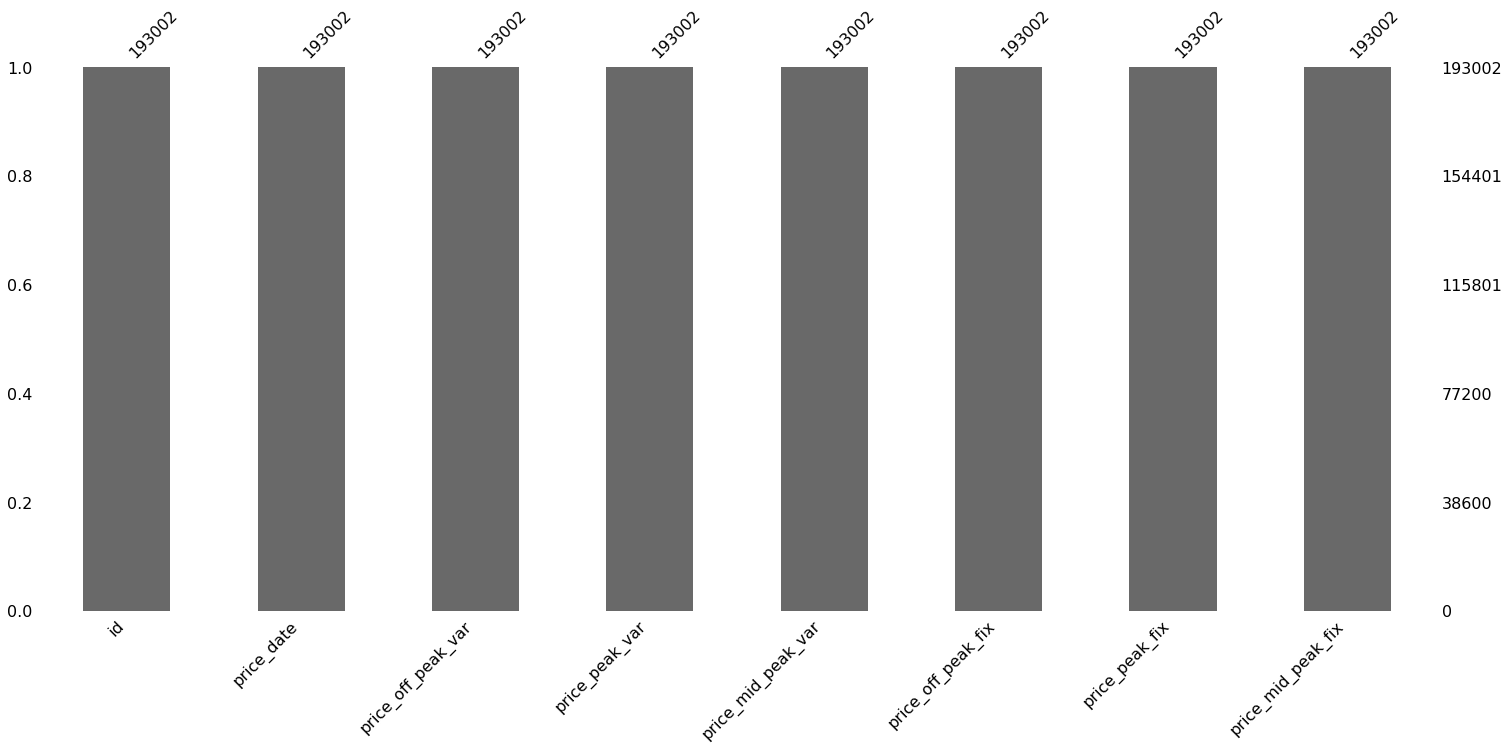

In [22]:
# Price data
msno.bar(price_df)

From above we can see that all values of counts are similar which shows that their are no null values in the data.

<AxesSubplot:>

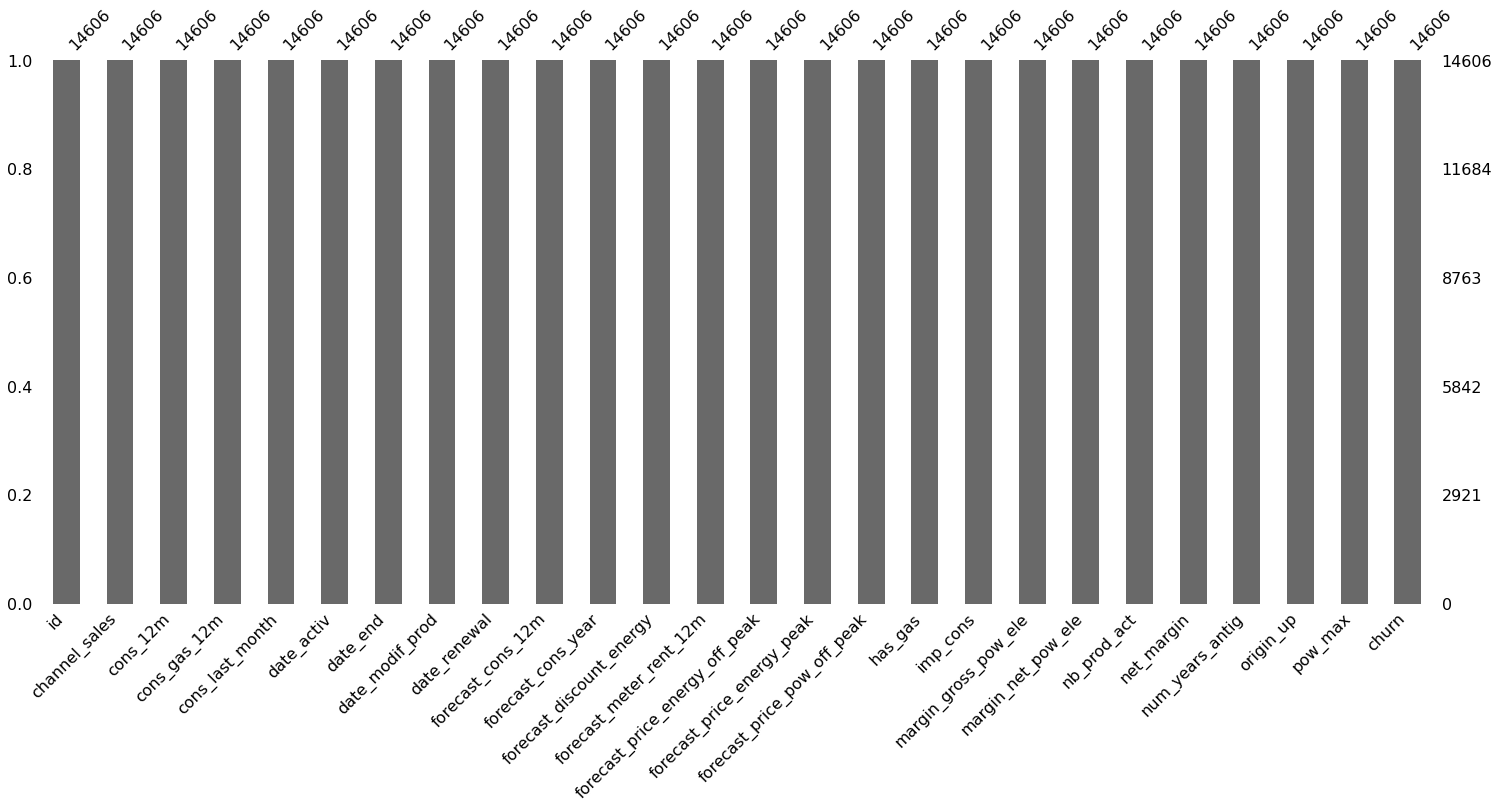

In [24]:
# Client data
msno.bar(client_df)

From above we can see that all values of count are similar which shows that their are no null values in the data.

<AxesSubplot:>

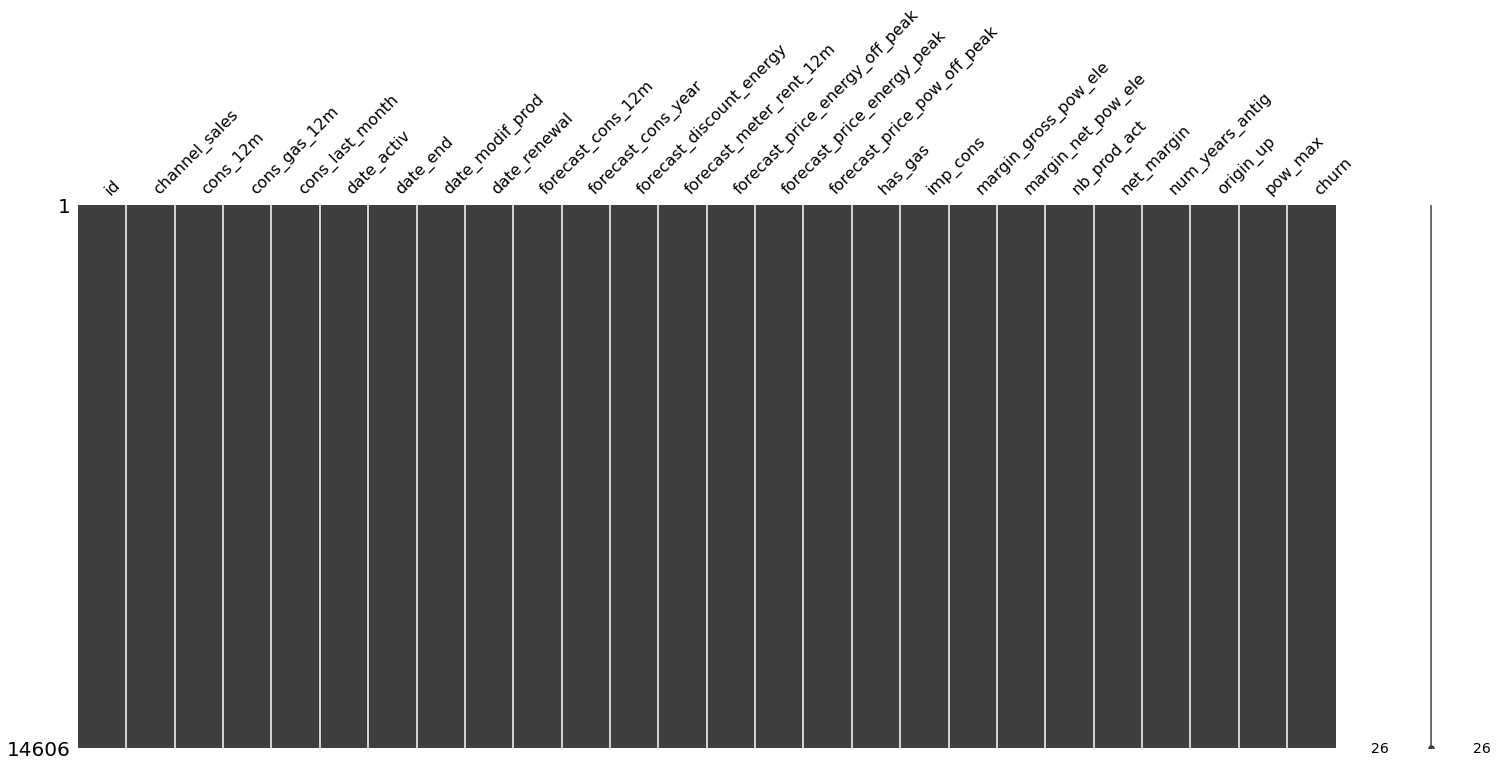

In [25]:
msno.matrix(client_df)

# DATA VISUALISATION

In [29]:
# Convert the has_gas column to  Yes/No
client_df['has_gas'] = client_df['has_gas'].replace({'t':'Yes','f':'No'})

<ipython-input-31-af4681177ea8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_tenure['z_score'] = list(abs_tenure_zscores)


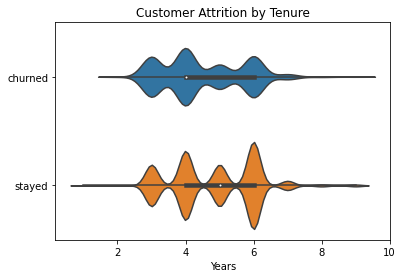

In [31]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=client_df['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure =client_df[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

The median age of churners is 4 years
Customers are more likely to churn during the 4th year than the 7th year
The median age of retained customers is 5 years

In [32]:
# Most popular electricty campaign
ele_nm = client_df.loc[(client_df['churn']>='Stayed') & (client_df['net_margin']>0),['id', 'origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    7038
kamkkxfxxuwbdslkwifmmcsiusiuosws    4258
ldkssxwpmemidmecebumciepifcamkci    3060
MISSING                               62
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [33]:
# Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1461977.57
kamkkxfxxuwbdslkwifmmcsiusiuosws     664274.11
ldkssxwpmemidmecebumciepifcamkci     620281.40
MISSING                               17567.91
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


The most popular electricity campaign is lxidpiddsbxsbosboudacockeimpuepw which has brought 6,584 current customers.
The electricity campaign attributable to the highest total net margin is lxidpiddsbxsbosboudacockeimpuepw. Netting $1461977.57in 2015.

In [35]:
 #Select current customers with positive net margins
top_customers = client_df.loc[(client_df['churn']>='Stayed') & (client_df['net_margin']>0),['id','num_years_antig','net_margin']]

# Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
2596,fb7dcb0f4e0dc4ee54874eab2607c4da,3,24570.65
10718,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
12348,818b8bca0a9d7668252d46b978169325,4,4346.37
7794,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
3861,e8948a5469344e9ad0dfcacbb705f709,4,3768.16
12624,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
14274,6c2d7343c53156d1f6ec797be3bf22af,4,3403.27
1316,6f918b83d4a565c165a4ac842d724a2b,4,3323.02
4876,9590c7a6100ae76ec078aa177ffb8d0d,3,3215.03
3478,e7bdc7743d73a9bf94cc3c6a293fca93,4,2711.19


These are the most profitable customers for PowerCo in terms of net margin. Beware most of them are within the likely tenure of attrition. Time for a marketing campaign!